<a href="https://colab.research.google.com/github/Harini-702/Diabetes/blob/main/Principal_Component_Analysis_and_Admission_Data_Analysis_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and Admission Data Analysis using Machine Learning**

**Install Pycaret**

In [ ]:
!pip install pycaret==2.3.6


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%bash
pip install seaborn==0.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib==3.6.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.12.1


**Dataset**

The “Research Admission Dataset” used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provided information about academic attributes to identify whether a student is selected into research or non-research

There are 6 attributes with 400 entries and one column for classification. 
**0 represents No_Research and 1 represents Research.**


All attributes are numerical and they are listed bellow:

1. GRE score
2. TOEFL score
3. University Rating
4. SOP
5. CGPA
6. Chance of Admit 
7. Research (Label)

The original dataset can be found on below link:
https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university?resource=download





In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Harini-702/Diabetes/main/adm_data.csv')
df.head(25)

GRE Score  TOEFL Score  University Rating  SOP  CGPA  Research  \
0         337          118                  4  4.5  9.65         1   
1         324          107                  4  4.0  8.87         1   
2         316          104                  3  3.0  8.00         1   
3         322          110                  3  3.5  8.67         1   
4         314          103                  2  2.0  8.21         0   
5         330          115                  5  4.5  9.34         1   
6         321          109                  3  3.0  8.20         1   
7         308          101                  2  3.0  7.90         0   
8         302          102                  1  2.0  8.00         0   
9         323          108                  3  3.5  8.60         0   
10        325          106                  3  3.5  8.40         1   
11        327          111                  4  4.0  9.00         1   
12        328          112                  4  4.0  9.10         1   
13        307          109                  3  4.0  8.00         1   
14        311          104                  3  3.5  8.20         1   
15        314          105                  3  3.5  8.30         0   
16        317          107                  3  4.0  8.70         0   
17        319          106                  3  4.0  8.00         1   
18        318          110                  3  4.0  8.80         0   
19        303          102                  3  3.5  8.50         0   
20        312          107                  3  3.0  7.90         1   
21        325          114                  4  3.0  8.40         0   
22        328          116                  5  5.0  9.50         1   
23        334          119                  5  5.0  9.70         1   
24        336          119                  5  4.0  9.80         1   

    Chance of Admit   
0               0.92  
1               0.76  
2               0.72  
3               0.80  
4               0.65  
5               0.90  
6               0.75  
7               0.68  
8               0.50  
9               0.45  
10              0.52  
11              0.84  
12              0.78  
13              0.62  
14              0.61  
15              0.54  
16              0.66  
17              0.65  
18              0.63  
19              0.62  
20              0.64  
21              0.70  
22              0.94  
23              0.95  
24              0.97

In [ ]:
len(df.index)

400

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   CGPA               400 non-null    float64
 5   Research           400 non-null    int64  
 6   Chance of Admit    400 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 22.0 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

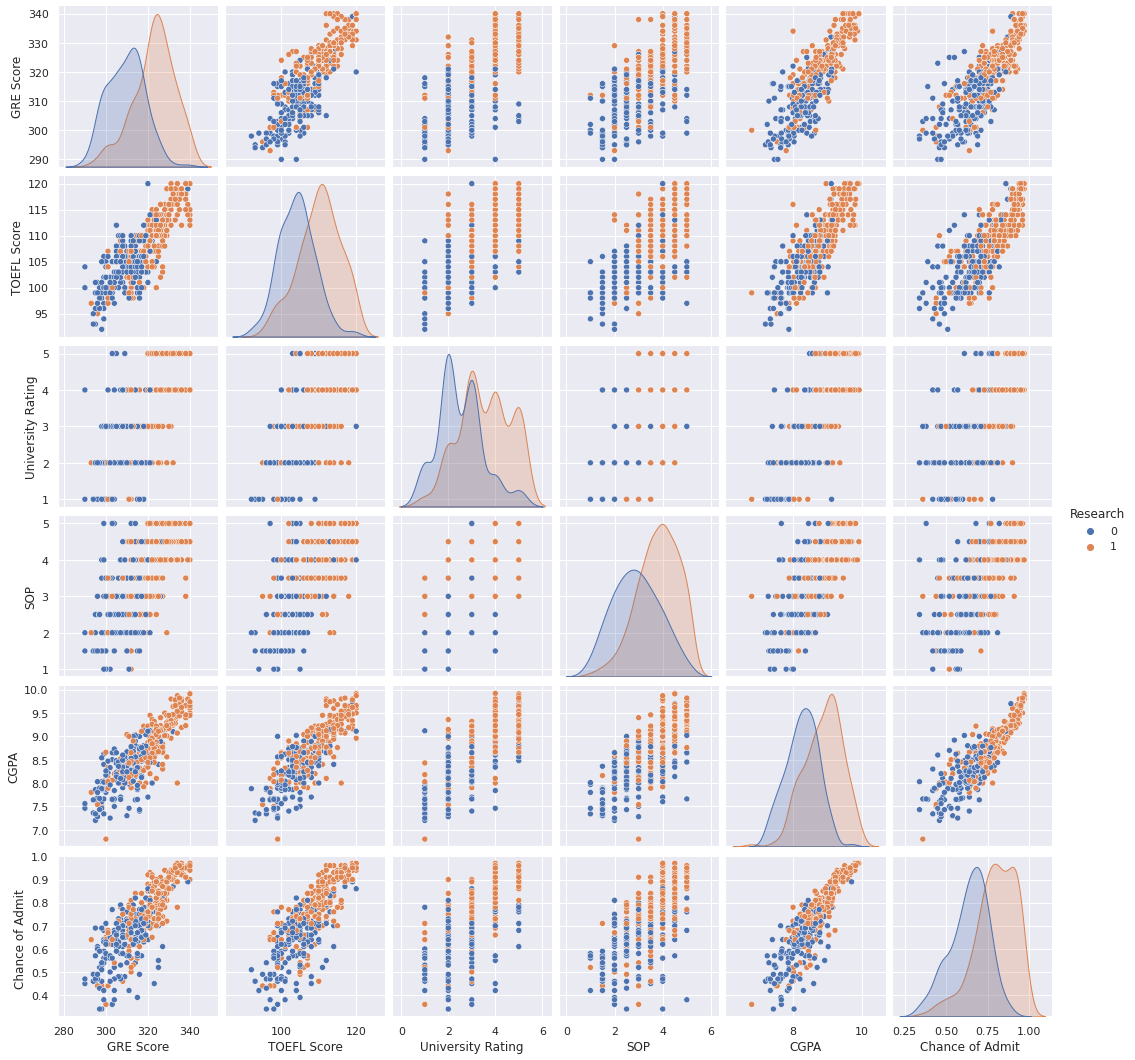

In [ ]:
sns.pairplot(df, hue='Research')
plt.show()

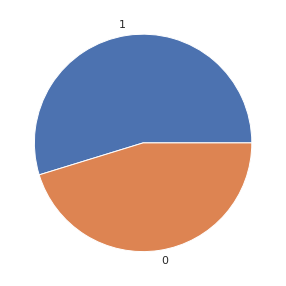

In [ ]:
y =df['Research']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['Research'])
X.head(10)

GRE Score  TOEFL Score  University Rating  SOP  CGPA  Chance of Admit 
0        337          118                  4  4.5  9.65              0.92
1        324          107                  4  4.0  8.87              0.76
2        316          104                  3  3.0  8.00              0.72
3        322          110                  3  3.5  8.67              0.80
4        314          103                  2  2.0  8.21              0.65
5        330          115                  5  4.5  9.34              0.90
6        321          109                  3  3.0  8.20              0.75
7        308          101                  2  3.0  7.90              0.68
8        302          102                  1  2.0  8.00              0.50
9        323          108                  3  3.5  8.60              0.45

In [ ]:
X.describe().transpose()

count        mean        std     min     25%     50%  \
GRE Score          400.0  316.807500  11.473646  290.00  308.00  317.00   
TOEFL Score        400.0  107.410000   6.069514   92.00  103.00  107.00   
University Rating  400.0    3.087500   1.143728    1.00    2.00    3.00   
SOP                400.0    3.400000   1.006869    1.00    2.50    3.50   
CGPA               400.0    8.598925   0.596317    6.80    8.17    8.61   
Chance of Admit    400.0    0.724350   0.142609    0.34    0.64    0.73   

                        75%     max  
GRE Score          325.0000  340.00  
TOEFL Score        112.0000  120.00  
University Rating    4.0000    5.00  
SOP                  4.0000    5.00  
CGPA                 9.0625    9.92  
Chance of Admit      0.8300    0.97

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

GRE Score  TOEFL Score  University Rating       SOP      CGPA  \
0   1.762107     1.746971           0.798829  1.093864  1.764818   
1   0.627656    -0.067635           0.798829  0.596653  0.455151   
2  -0.070467    -0.562528          -0.076600 -0.397769 -1.005631   
3   0.453126     0.427257          -0.076600  0.099442  0.119339   
4  -0.244998    -0.727492          -0.952029 -1.392191 -0.653029   
5   1.151249     1.252078           1.674257  1.093864  1.244310   
6   0.365860     0.262293          -0.076600 -0.397769 -0.669819   
7  -0.768590    -1.057420          -0.952029 -0.397769 -1.173537   
8  -1.292182    -0.892456          -1.827457 -1.392191 -1.005631   
9   0.540391     0.097329          -0.076600  0.099442  0.001805   

   Chance of Admit   
0          1.373648  
1          0.250297  
2         -0.030541  
3          0.531135  
4         -0.522007  
5          1.233229  
6          0.180087  
7         -0.311379  
8         -1.575149  
9         -1.926196

In [ ]:
X.describe().transpose()

count          mean       std       min       25%  \
GRE Score          400.0 -4.174439e-16  1.001252 -2.339367 -0.768590   
TOEFL Score        400.0  5.595524e-16  1.001252 -2.542098 -0.727492   
University Rating  400.0  7.105427e-17  1.001252 -1.827457 -0.952029   
SOP                400.0  7.993606e-17  1.001252 -2.386613 -0.894980   
CGPA               400.0  7.771561e-16  1.001252 -3.020504 -0.720191   
Chance of Admit    400.0 -3.375078e-16  1.001252 -2.698500 -0.592217   

                        50%       75%       max  
GRE Score          0.016799  0.714922  2.023903  
TOEFL Score       -0.067635  0.757186  2.076899  
University Rating -0.076600  0.798829  1.674257  
SOP                0.099442  0.596653  1.591075  
CGPA               0.018596  0.778370  2.218165  
Chance of Admit    0.039668  0.741763  1.724695

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

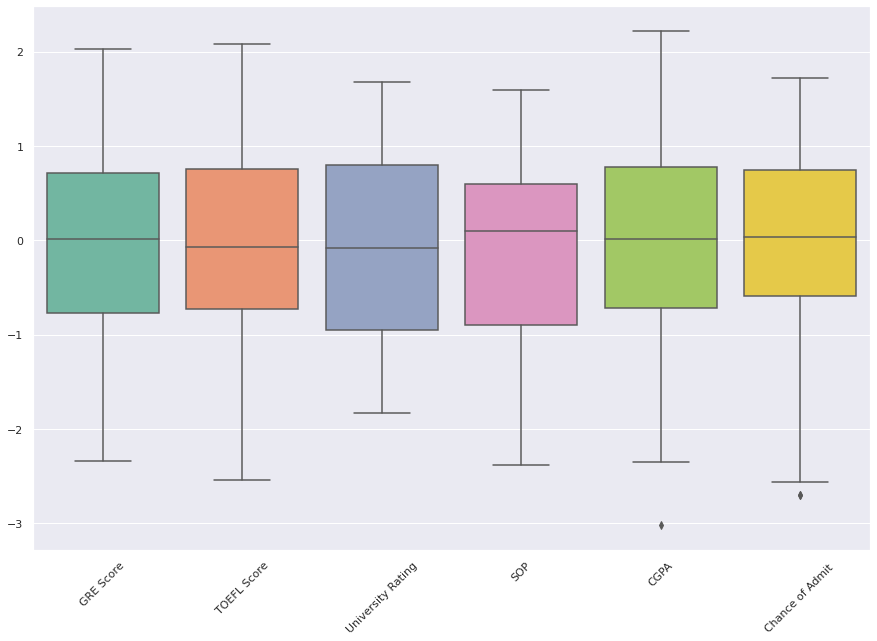

In [ ]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


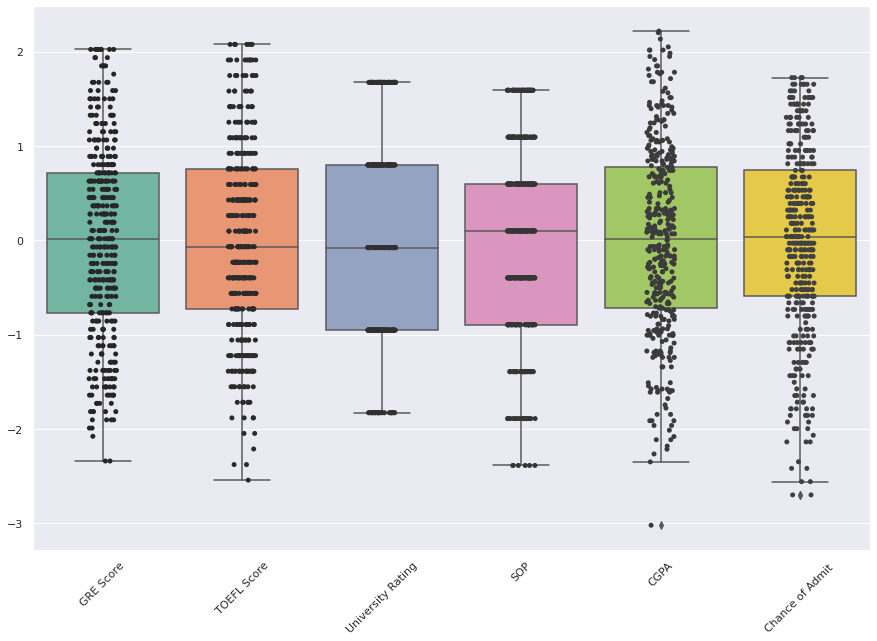

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

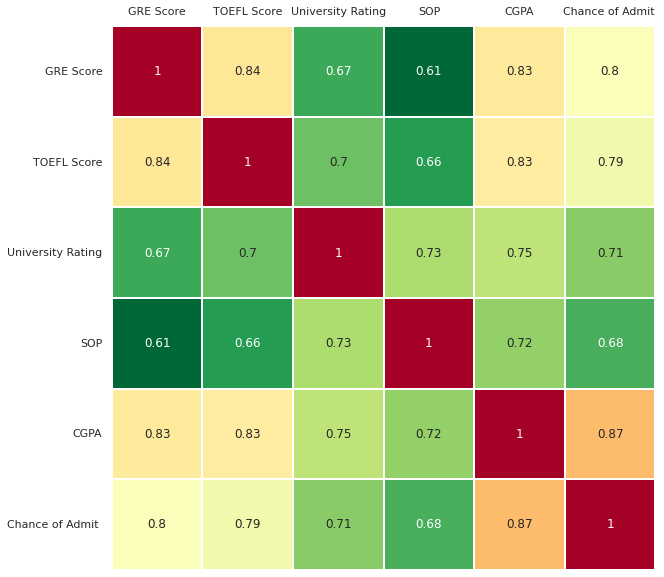

In [ ]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

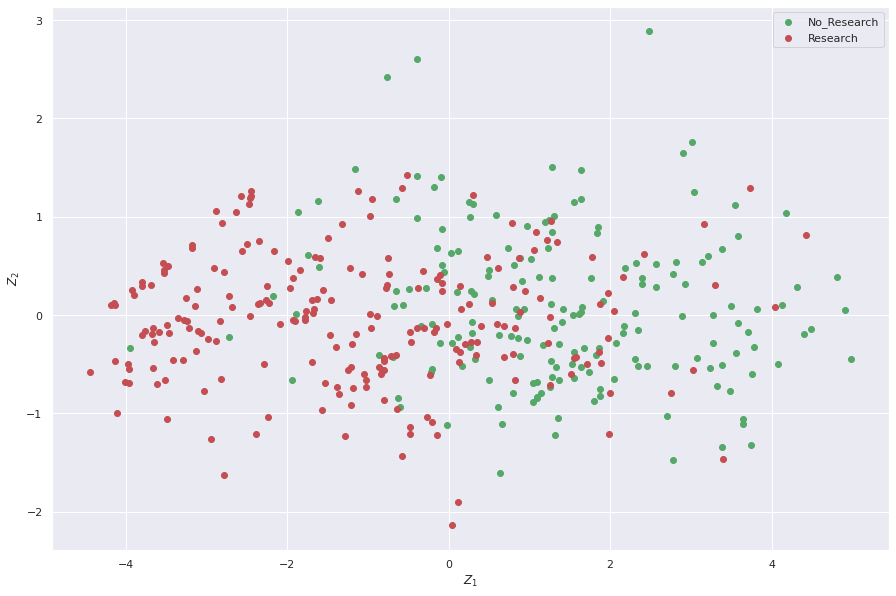

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# (Research)->1,  (No_Research)->0

idx_No_Research= np.where(y == 0)
idx_Research = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_No_Research,0], Z[idx_No_Research,1], c='g', label='No_Research')
plt.scatter(Z[idx_Research,0], Z[idx_Research,1], c='r', label='Research')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[-0.41124862, -0.42647317,  0.01372054,  0.29621392,  0.7352558 ,
         0.14304958],
       [-0.41579094, -0.29027264, -0.03937528,  0.56526985, -0.64410231,
         0.08313533],
       [-0.39119948,  0.47552007,  0.78605371,  0.03091709,  0.02232781,
         0.03884322],
       [-0.3764665 ,  0.67075408, -0.60612237,  0.14508971,  0.11558395,
         0.08103665],
       [-0.43236019, -0.13874547, -0.07699493, -0.31112962, -0.03392181,
        -0.83062255],
       [-0.41987269, -0.19642239, -0.08407349, -0.6884176 , -0.1718204 ,
         0.52403796]])

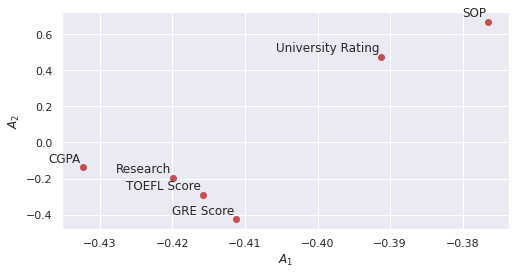

In [ ]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


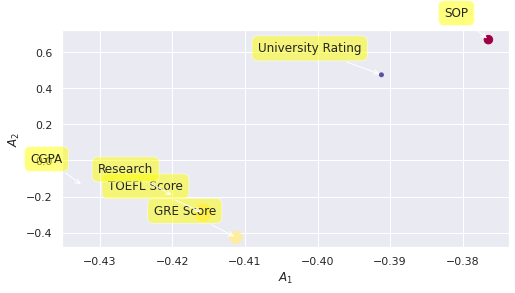

In [ ]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([4.74971355, 0.50116295, 0.26190961, 0.2255488 , 0.15871939,
       0.1179833 ])

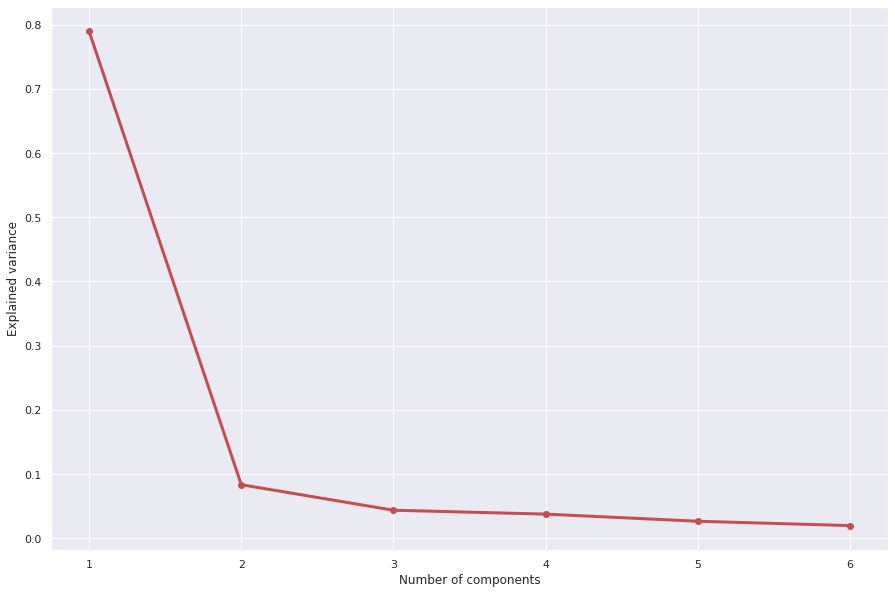

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

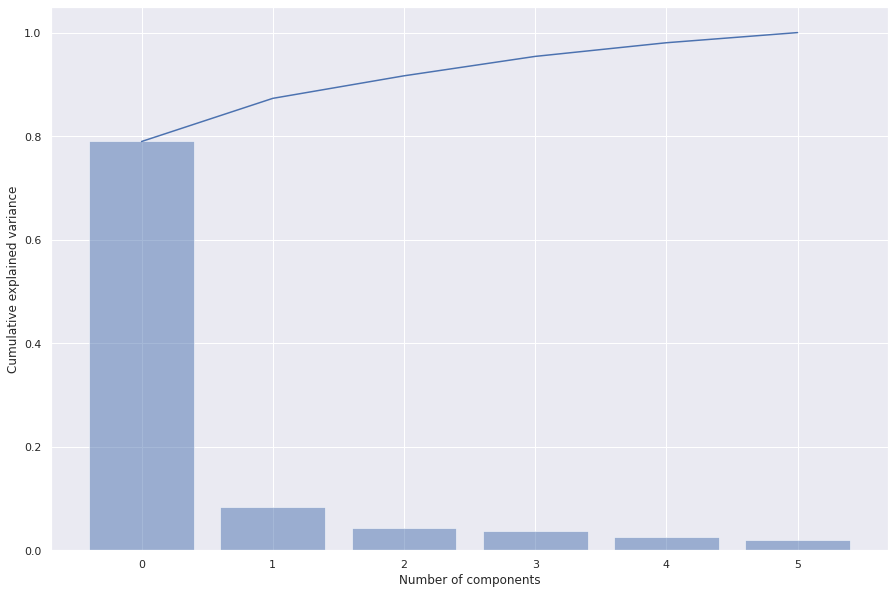

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([-6.59691807e-01,  4.19706630e-01,  3.56344829e-02, -4.07875057e-01,
       -8.77731792e-01,  2.60559944e-01, -4.77834745e-01,  1.39194222e-01,
       -5.43752199e-01,  1.49659914e-01,  1.21053822e-01, -2.40915092e-02,
       -4.97443968e-02,  9.36078438e-01,  6.60327958e-01,  5.74033073e-01,
        4.41447847e-01,  5.91763840e-01,  2.78653658e-01,  9.70148645e-01,
        1.74468003e-01, -4.27478069e-01,  5.28177621e-01,  1.00842632e-01,
       -6.91480320e-01, -4.66759477e-01,  1.16446770e+00,  7.86543828e-02,
        3.89255995e-01, -5.07141126e-01,  6.23243120e-01,  2.43681799e-01,
       -1.62539589e+00, -4.57795432e-01, -1.28834318e-01,  1.26584882e+00,
        8.40412923e-01, -1.34371915e+00, -5.92645464e-03,  8.30637669e-01,
        7.38122525e-01, -4.91446397e-01, -6.00617950e-01, -2.28642810e-01,
        4.77426101e-01,  1.21471232e+00,  7.66358854e-02, -3.36001193e-01,
       -4.40173282e-01, -4.68582683e-01, -2.39666848e-02, -7.96817039e-01,
       -2.08322660e-01,  

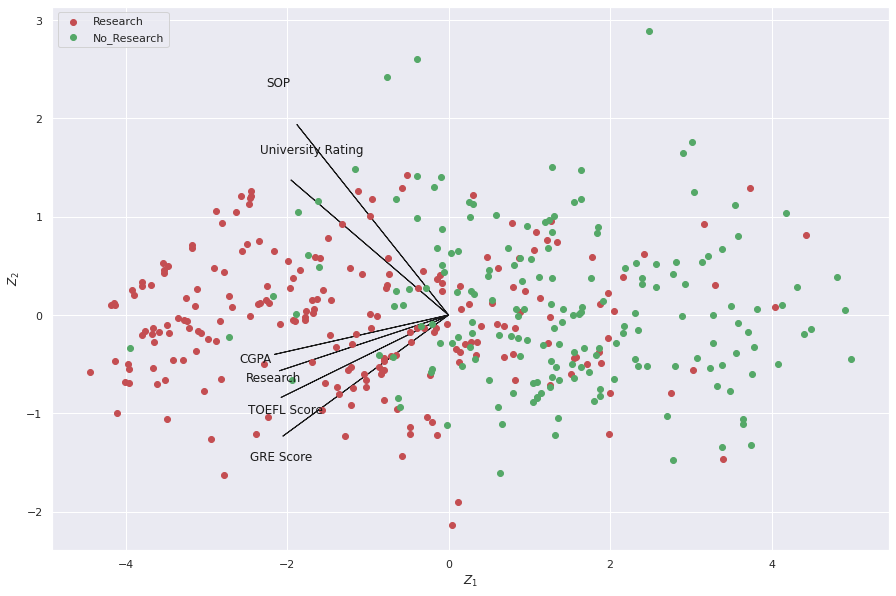

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Research,0], Z[idx_Research,1], c='r', label='Research')
plt.scatter(Z[idx_No_Research,0], Z[idx_No_Research,1], c='g', label='No_Research')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=b496d3ffef6e7c73deaec7e3cf5f888261b785a11809117ed45a35e429fc5b79
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=c269d671c04f86249129ee469350c96362fa0cb703f51b661abf3df42d275447
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3       PC4
0   -3.515138 -0.659692 -0.331073  0.198146
1   -1.069004  0.419707  0.221465 -0.054966
2    0.890204  0.035634  0.282064 -0.065027
3   -0.646074 -0.407875 -0.184935 -0.014975
4    1.801306 -0.877732  0.214943 -0.152692
..        ...       ...       ...       ...
395 -1.045413 -0.596085 -0.242179 -0.253233
396 -0.798120 -0.867043  0.059020 -0.712507
397 -3.139254  0.090481 -0.596076  0.055657
398  0.496310  0.453134 -0.088925 -0.355342
399 -3.585876 -0.173137 -0.649739 -0.076585

[400 rows x 4 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [400] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [400] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot: title={'center': '4 Principal Components explain [98.03%] of the variance'}, xlabel='PC1 (78.9% expl.var)', ylabel='PC2 (8.33% expl.var)'>)

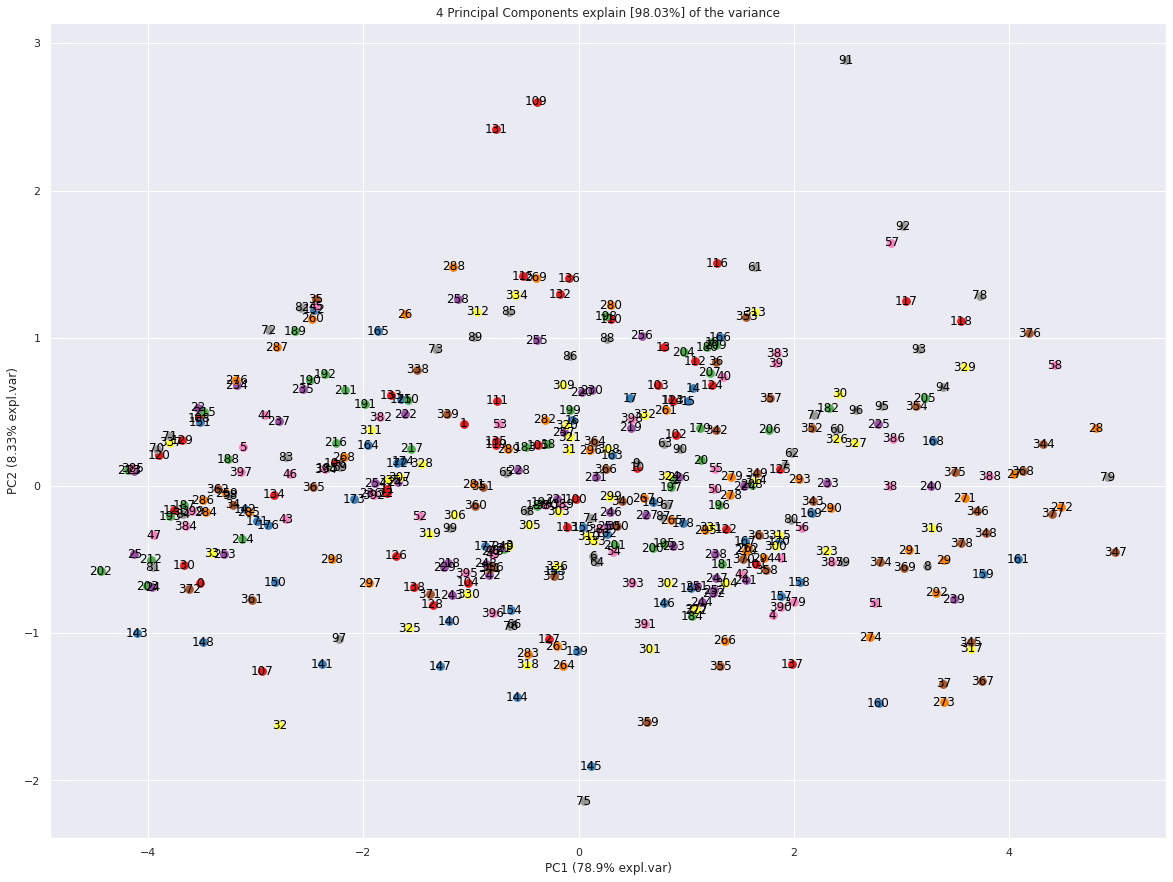

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4
GRE Score         -0.411249 -0.426473  0.013721  0.296214
TOEFL Score       -0.415791 -0.290273 -0.039375  0.565270
University Rating -0.391199  0.475520  0.786054  0.030917
SOP               -0.376467  0.670754 -0.606122  0.145090
CGPA              -0.432360 -0.138745 -0.076995 -0.311130
Chance of Admit   -0.419873 -0.196422 -0.084073 -0.688418

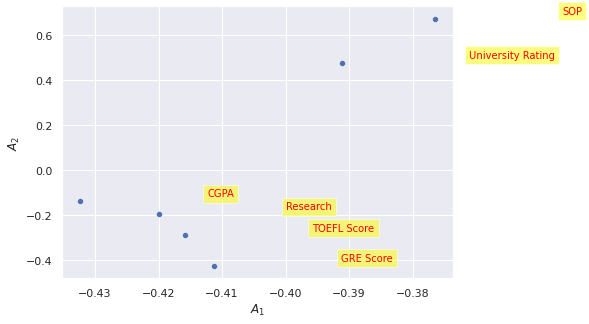

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
 

**Scree Plot**

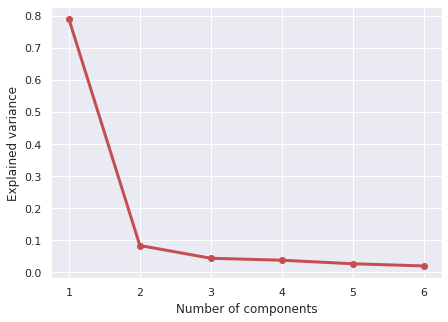

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

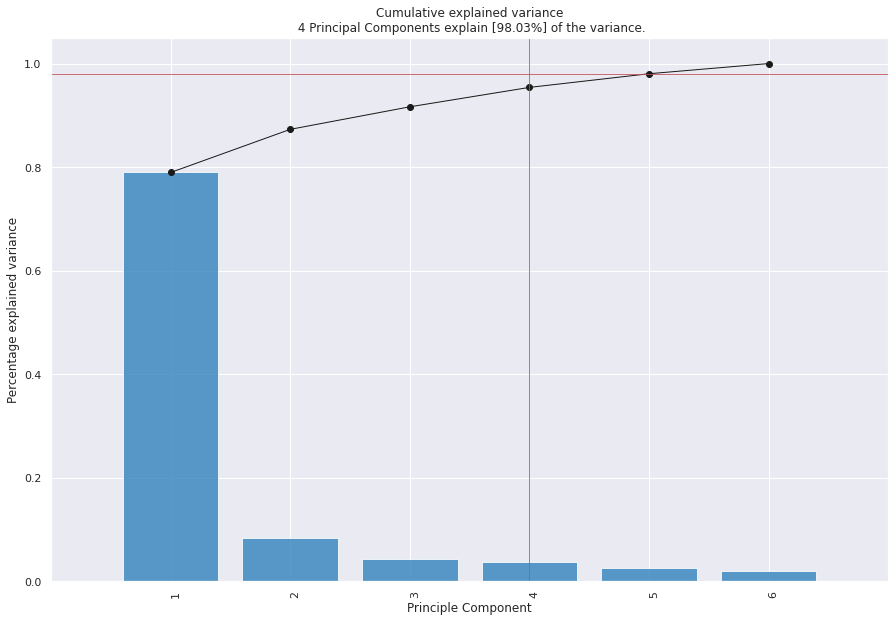

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [400] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [400] unique colors! Available unique colors: [9].


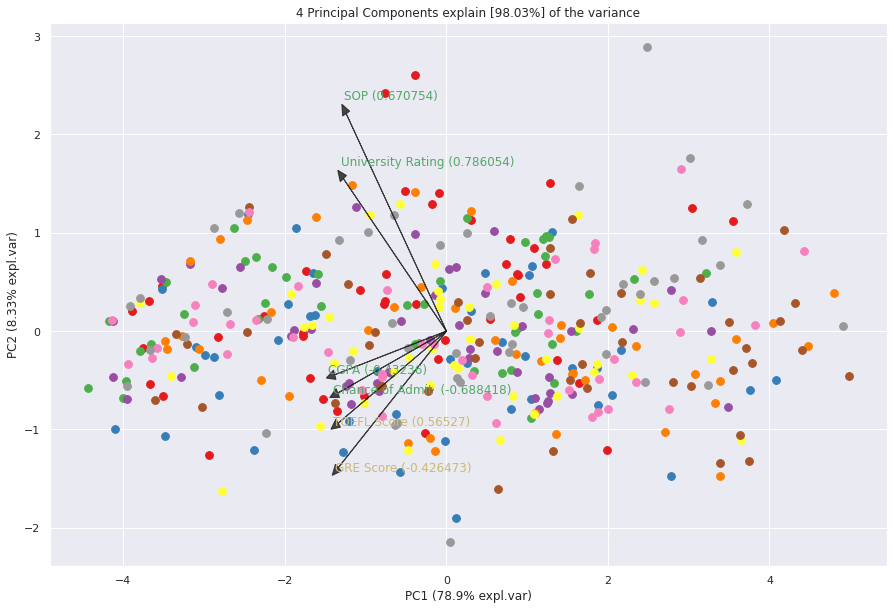

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot: title={'center': '4 Principal Components explain [98.03%] of the variance'}, xlabel='PC1 (78.9% expl.var)', ylabel='PC2 (8.33% expl.var)'>)

In [ ]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [400] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [400] unique colors! Available unique colors: [9].


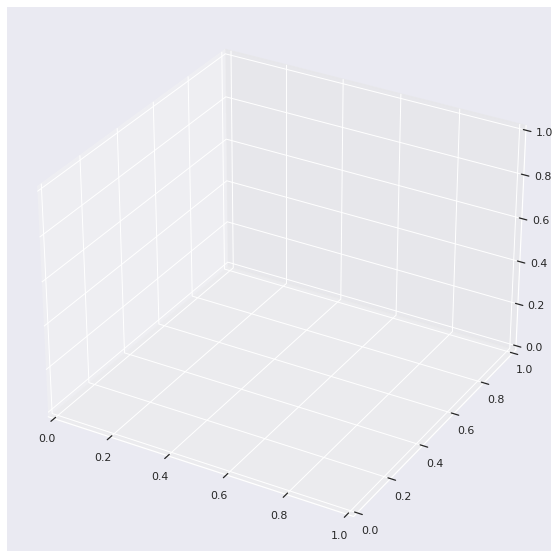

(<Figure size 1080x720 with 1 Axes>,
 <Axes3D: title={'center': '4 Principal Components explain [98.03%] of the variance'}, xlabel='PC1 (78.9% expl.var)', ylabel='PC2 (8.33% expl.var)', zlabel='PC3 (4.35% expl.var)'>)

In [ ]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. 
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (360, 7)
Unseen Data For Predictions: (40, 7)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='Research', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target          Research
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (360, 7)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (251, 10)
12                    Transformed Test Set         (109, 10)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              f451
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Research',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing All Models**

In [ ]:
#show the best model and their statistics
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.8126  0.8104  0.7747  0.8649   
lr                    Logistic Regression    0.7846  0.8526  0.8132  0.7943   
lda          Linear Discriminant Analysis    0.7771  0.8566  0.8066  0.7892   
rf               Random Forest Classifier    0.7726  0.8338  0.7379  0.8265   
et                 Extra Trees Classifier    0.7725  0.8323  0.7302  0.8285   
gbc          Gradient Boosting Classifier    0.7691  0.8339  0.7610  0.8034   
ridge                    Ridge Classifier    0.7689  0.0000  0.8060  0.7759   
ada                  Ada Boost Classifier    0.7651  0.8433  0.7445  0.8017   
nb                            Naive Bayes    0.7526  0.8458  0.7989  0.7621   
lightgbm  Light Gradient Boosting Machine    0.7452  0.8167  0.7319  0.7857   
dt               Decision Tree Classifier    0.7174  0.7154  0.7687  0.7275   
qda       Quadratic Discriminant Analysis    0.6462  0.7081  0.6132  0.5830   
dummy                    Dummy Classifier    0.5338  0.5000  1.0000  0.5338   
svm                   SVM - Linear Kernel    0.4972  0.0000  0.2071  0.1937   

              F1   Kappa     MCC  TT (Sec)  
knn       0.8148  0.6255  0.6327     0.013  
lr        0.8008  0.5664  0.5712     0.392  
lda       0.7935  0.5511  0.5570     0.010  
rf        0.7768  0.5457  0.5531     0.173  
et        0.7728  0.5466  0.5550     0.142  
gbc       0.7789  0.5376  0.5421     0.095  
ridge     0.7874  0.5343  0.5394     0.010  
ada       0.7695  0.5298  0.5339     0.070  
nb        0.7758  0.5006  0.5082     0.011  
lightgbm  0.7555  0.4901  0.4948     0.101  
dt        0.7446  0.4304  0.4353     0.010  
qda       0.5847  0.3052  0.3160     0.011  
dummy     0.6959  0.0000  0.0000     0.012  
svm       0.1768  0.0398  0.0323     0.009

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

 Create a Model

**Logistic Regresssion**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.9048  0.9286  0.8125  0.8667  0.6867  0.6953
1       0.7600  0.8077  0.6923  0.8182  0.7500  0.5223  0.5290
2       0.7200  0.8718  0.8462  0.6875  0.7586  0.4337  0.4470
3       0.8400  0.8462  0.8462  0.8462  0.8462  0.6795  0.6795
4       0.7600  0.8333  0.7692  0.7692  0.7692  0.5192  0.5192
5       0.6800  0.8141  0.7692  0.6667  0.7143  0.3548  0.3595
6       0.8800  0.9551  0.9231  0.8571  0.8889  0.7588  0.7613
7       0.7200  0.7987  0.7143  0.7692  0.7407  0.4373  0.4387
8       0.8000  0.8377  0.8571  0.8000  0.8276  0.5902  0.5922
9       0.8400  0.8571  0.7857  0.9167  0.8462  0.6815  0.6903
Mean    0.7846  0.8526  0.8132  0.7943  0.8008  0.5664  0.5712
SD      0.0631  0.0455  0.0765  0.0718  0.0578  0.1270  0.1266

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune the model**

In [ ]:
tuned_lr=tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.9167  0.8571  0.8571  0.8571  0.6905  0.6905
1       0.7600  0.8205  0.6923  0.8182  0.7500  0.5223  0.5290
2       0.7600  0.8846  0.7692  0.7692  0.7692  0.5192  0.5192
3       0.8400  0.8654  0.8462  0.8462  0.8462  0.6795  0.6795
4       0.7600  0.8077  0.6923  0.8182  0.7500  0.5223  0.5290
5       0.6800  0.8462  0.7692  0.6667  0.7143  0.3548  0.3595
6       0.8800  0.9615  0.8462  0.9167  0.8800  0.7604  0.7628
7       0.7600  0.8052  0.7857  0.7857  0.7857  0.5130  0.5130
8       0.8000  0.8377  0.7857  0.8462  0.8148  0.5981  0.6000
9       0.8800  0.8312  0.7857  1.0000  0.8800  0.7634  0.7857
Mean    0.7966  0.8577  0.7830  0.8324  0.8047  0.5923  0.5968
SD      0.0610  0.0479  0.0551  0.0838  0.0563  0.1235  0.1255

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_lr

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**


In [ ]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with K-nearest neighbour**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.8839  0.8571  0.8571  0.8571  0.6905  0.6905
1       0.8000  0.7885  0.6923  0.9000  0.7826  0.6032  0.6210
2       0.8000  0.8397  0.6923  0.9000  0.7826  0.6032  0.6210
3       0.8400  0.9103  0.7692  0.9091  0.8333  0.6815  0.6903
4       0.7600  0.7660  0.7692  0.7692  0.7692  0.5192  0.5192
5       0.7200  0.6891  0.7692  0.7143  0.7407  0.4373  0.4387
6       0.8400  0.7917  0.7692  0.9091  0.8333  0.6815  0.6903
7       0.8400  0.8377  0.7857  0.9167  0.8462  0.6815  0.6903
8       0.8400  0.7630  0.8571  0.8571  0.8571  0.6753  0.6753
9       0.8400  0.8344  0.7857  0.9167  0.8462  0.6815  0.6903
Mean    0.8126  0.8104  0.7747  0.8649  0.8148  0.6255  0.6327
SD      0.0407  0.0611  0.0525  0.0661  0.0398  0.0818  0.0832

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune model with K-nearest neighbour**

In [ ]:
tuned_knn = tune_model(knn)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8077  0.8393  0.7857  0.8462  0.8148  0.6154  0.6172
1       0.7600  0.8013  0.6154  0.8889  0.7273  0.5253  0.5538
2       0.8000  0.8526  0.6923  0.9000  0.7826  0.6032  0.6210
3       0.8400  0.9038  0.8462  0.8462  0.8462  0.6795  0.6795
4       0.8000  0.8077  0.7692  0.8333  0.8000  0.6006  0.6026
5       0.7200  0.8013  0.7692  0.7143  0.7407  0.4373  0.4387
6       0.8400  0.7853  0.7692  0.9091  0.8333  0.6815  0.6903
7       0.8000  0.8052  0.7857  0.8462  0.8148  0.5981  0.6000
8       0.8400  0.7955  0.8571  0.8571  0.8571  0.6753  0.6753
9       0.8000  0.8571  0.7857  0.8462  0.8148  0.5981  0.6000
Mean    0.8008  0.8249  0.7676  0.8487  0.8032  0.6014  0.6078
SD      0.0359  0.0353  0.0663  0.0513  0.0402  0.0714  0.0696

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

**Evaluate model with K-nearest neighbour**

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with Quadratic Discriminant Analysis**

In [ ]:
qda=create_model('qda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4615  0.5000  0.0000  0.0000  0.0000  0.0000  0.0000
1       0.7600  0.8333  0.7692  0.7692  0.7692  0.5192  0.5192
2       0.6800  0.8205  0.7692  0.6667  0.7143  0.3548  0.3595
3       0.5200  0.4295  0.9231  0.5217  0.6667  0.0066  0.0118
4       0.8000  0.8782  0.8462  0.7857  0.8148  0.5981  0.6000
5       0.7600  0.8462  0.9231  0.7059  0.8000  0.5130  0.5424
6       0.8000  0.9487  0.6154  1.0000  0.7619  0.6057  0.6591
7       0.5200  0.5130  0.6429  0.5625  0.6000  0.0066  0.0067
8       0.7200  0.6623  0.6429  0.8182  0.7200  0.4479  0.4610
9       0.4400  0.6494  0.0000  0.0000  0.0000  0.0000  0.0000
Mean    0.6462  0.7081  0.6132  0.5830  0.5847  0.3052  0.3160
SD      0.1372  0.1728  0.3239  0.3180  0.2984  0.2554  0.2649

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


**Tune QDA Model**

In [ ]:
tuned_qda=tune_model(qda)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8846  0.8869  0.8571  0.9231  0.8889  0.7692  0.7715
1       0.7200  0.8077  0.6154  0.8000  0.6957  0.4444  0.4576
2       0.8800  0.9167  0.8462  0.9167  0.8800  0.7604  0.7628
3       0.8400  0.8718  0.8462  0.8462  0.8462  0.6795  0.6795
4       0.7600  0.7564  0.6923  0.8182  0.7500  0.5223  0.5290
5       0.6800  0.8462  0.7692  0.6667  0.7143  0.3548  0.3595
6       0.8800  0.9679  0.8462  0.9167  0.8800  0.7604  0.7628
7       0.7600  0.8052  0.7857  0.7857  0.7857  0.5130  0.5130
8       0.8000  0.8506  0.7857  0.8462  0.8148  0.5981  0.6000
9       0.8800  0.8442  0.7857  1.0000  0.8800  0.7634  0.7857
Mean    0.8085  0.8554  0.7830  0.8519  0.8136  0.6166  0.6222
SD      0.0716  0.0570  0.0735  0.0883  0.0697  0.1443  0.1446

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.47,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate QDA Model**

In [ ]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.47,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_qda)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.47,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='Research', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target          Research
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (360, 7)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (251, 3)
12                    Transformed Test Set          (109, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              415b
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Research',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                ('dummy', Dummify(target='Research')),
                ('fix_perfect', Remove_100(target='Research')),
                ('clean_names', Clean_Colum_Names()),
 

# **Comparing Models**

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
nb                            Naive Bayes    0.7846  0.8438  0.7912  0.8065   
qda       Quadratic Discriminant Analysis    0.7686  0.8393  0.7764  0.7930   
ridge                    Ridge Classifier    0.7649  0.0000  0.7984  0.7732   
lda          Linear Discriminant Analysis    0.7649  0.8430  0.7984  0.7732   
lr                    Logistic Regression    0.7648  0.8463  0.7984  0.7730   
svm                   SVM - Linear Kernel    0.7368  0.0000  0.7857  0.7708   
rf               Random Forest Classifier    0.7209  0.8012  0.7385  0.7405   
et                 Extra Trees Classifier    0.7169  0.8067  0.7456  0.7326   
gbc          Gradient Boosting Classifier    0.7091  0.7844  0.7022  0.7443   
knn                K Neighbors Classifier    0.6929  0.7925  0.7456  0.7036   
lightgbm  Light Gradient Boosting Machine    0.6889  0.7880  0.6874  0.7210   
ada                  Ada Boost Classifier    0.6775  0.7603  0.6725  0.7128   
dt               Decision Tree Classifier    0.6569  0.6558  0.6775  0.6837   
dummy                    Dummy Classifier    0.5338  0.5000  1.0000  0.5338   

              F1   Kappa     MCC  TT (Sec)  
nb        0.7962  0.5680  0.5717     0.025  
qda       0.7810  0.5352  0.5402     0.016  
ridge     0.7839  0.5255  0.5285     0.019  
lda       0.7839  0.5255  0.5285     0.010  
lr        0.7837  0.5254  0.5284     0.026  
svm       0.7625  0.4663  0.4951     0.026  
rf        0.7347  0.4402  0.4454     0.356  
et        0.7320  0.4315  0.4400     0.155  
gbc       0.7180  0.4181  0.4234     0.059  
knn       0.7206  0.3800  0.3855     0.073  
lightgbm  0.6987  0.3788  0.3834     0.023  
ada       0.6883  0.3540  0.3582     0.151  
dt        0.6768  0.3108  0.3151     0.023  
dummy     0.6959  0.0000  0.0000     0.008

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:compare_models() succesfully completed......................................


# **Best model with PCA**

In [ ]:
best_model_pca

GaussianNB(priors=None, var_smoothing=1e-09)

# **Tune Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.8810  0.8571  0.8571  0.8571  0.6905  0.6905
1       0.7600  0.7436  0.6923  0.8182  0.7500  0.5223  0.5290
2       0.8000  0.8782  0.7692  0.8333  0.8000  0.6006  0.6026
3       0.7600  0.8397  0.8462  0.7333  0.7857  0.5161  0.5230
4       0.7600  0.8526  0.7692  0.7692  0.7692  0.5192  0.5192
5       0.6800  0.7885  0.7692  0.6667  0.7143  0.3548  0.3595
6       0.9200  0.9872  0.9231  0.9231  0.9231  0.8397  0.8397
7       0.7200  0.7792  0.6429  0.8182  0.7200  0.4479  0.4610
8       0.8000  0.8312  0.8571  0.8000  0.8276  0.5902  0.5922
9       0.8000  0.8571  0.7857  0.8462  0.8148  0.5981  0.6000
Mean    0.7846  0.8438  0.7912  0.8065  0.7962  0.5680  0.5717
SD      0.0631  0.0639  0.0790  0.0671  0.0605  0.1258  0.1234

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GaussianNB(priors=None, var_smoothing=2e-09)
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Best Model**

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GaussianNB(priors=None, var_smoothing=2e-09), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
nb_pca = create_model('nb')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.8810  0.8571  0.8571  0.8571  0.6905  0.6905
1       0.7600  0.7436  0.6923  0.8182  0.7500  0.5223  0.5290
2       0.8000  0.8782  0.7692  0.8333  0.8000  0.6006  0.6026
3       0.7600  0.8397  0.8462  0.7333  0.7857  0.5161  0.5230
4       0.7600  0.8526  0.7692  0.7692  0.7692  0.5192  0.5192
5       0.6800  0.7885  0.7692  0.6667  0.7143  0.3548  0.3595
6       0.9200  0.9872  0.9231  0.9231  0.9231  0.8397  0.8397
7       0.7200  0.7792  0.6429  0.8182  0.7200  0.4479  0.4610
8       0.8000  0.8312  0.8571  0.8000  0.8276  0.5902  0.5922
9       0.8000  0.8571  0.7857  0.8462  0.8148  0.5981  0.6000
Mean    0.7846  0.8438  0.7912  0.8065  0.7962  0.5680  0.5717
SD      0.0631  0.0639  0.0790  0.0671  0.0605  0.1258  0.1234

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:create_model() succesfully completed......................................


# **Tune Model**

In [ ]:
tuned_nb_pca = tune_model(nb_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.8810  0.8571  0.8571  0.8571  0.6905  0.6905
1       0.7600  0.7436  0.6923  0.8182  0.7500  0.5223  0.5290
2       0.8000  0.8782  0.7692  0.8333  0.8000  0.6006  0.6026
3       0.7600  0.8397  0.8462  0.7333  0.7857  0.5161  0.5230
4       0.7600  0.8526  0.7692  0.7692  0.7692  0.5192  0.5192
5       0.6800  0.7885  0.7692  0.6667  0.7143  0.3548  0.3595
6       0.9200  0.9872  0.9231  0.9231  0.9231  0.8397  0.8397
7       0.7200  0.7792  0.6429  0.8182  0.7200  0.4479  0.4610
8       0.8000  0.8312  0.8571  0.8000  0.8276  0.5902  0.5922
9       0.8000  0.8571  0.7857  0.8462  0.8148  0.5981  0.6000
Mean    0.7846  0.8438  0.7912  0.8065  0.7962  0.5680  0.5717
SD      0.0631  0.0639  0.0790  0.0671  0.0605  0.1258  0.1234

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:GaussianNB(priors=None, var_smoothing=2e-09)
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Model**

In [ ]:
tuned_nb_pca

GaussianNB(priors=None, var_smoothing=2e-09)

In [ ]:
evaluate_model(tuned_nb_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GaussianNB(priors=None, var_smoothing=2e-09), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create Quadratic Discriminant Analysis Model**

In [ ]:
qda_pca = create_model('qda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.8810  0.7857  0.9167  0.8462  0.6941  0.7024
1       0.7200  0.7372  0.6154  0.8000  0.6957  0.4444  0.4576
2       0.7600  0.8974  0.7692  0.7692  0.7692  0.5192  0.5192
3       0.7600  0.8718  0.8462  0.7333  0.7857  0.5161  0.5230
4       0.7600  0.8397  0.7692  0.7692  0.7692  0.5192  0.5192
5       0.6800  0.7821  0.7692  0.6667  0.7143  0.3548  0.3595
6       0.9200  0.9487  0.9231  0.9231  0.9231  0.8397  0.8397
7       0.7200  0.7922  0.6429  0.8182  0.7200  0.4479  0.4610
8       0.8000  0.8312  0.8571  0.8000  0.8276  0.5902  0.5922
9       0.7200  0.8117  0.7857  0.7333  0.7586  0.4262  0.4277
Mean    0.7686  0.8393  0.7764  0.7930  0.7810  0.5352  0.5402
SD      0.0671  0.0591  0.0877  0.0756  0.0655  0.1350  0.1335

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


# **Tune Model**

In [ ]:
tuned_qda_pca = tune_model(qda_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.8929  0.8571  0.8571  0.8571  0.6905  0.6905
1       0.7600  0.8141  0.6923  0.8182  0.7500  0.5223  0.5290
2       0.7600  0.8846  0.7692  0.7692  0.7692  0.5192  0.5192
3       0.8000  0.8654  0.8462  0.7857  0.8148  0.5981  0.6000
4       0.7600  0.8462  0.7692  0.7692  0.7692  0.5192  0.5192
5       0.7200  0.8077  0.7692  0.7143  0.7407  0.4373  0.4387
6       0.9200  0.9936  0.9231  0.9231  0.9231  0.8397  0.8397
7       0.7200  0.7857  0.7143  0.7692  0.7407  0.4373  0.4387
8       0.7600  0.8117  0.8571  0.7500  0.8000  0.5033  0.5104
9       0.7600  0.8571  0.7857  0.7857  0.7857  0.5130  0.5130
Mean    0.7806  0.8559  0.7984  0.7942  0.7951  0.5580  0.5599
SD      0.0579  0.0568  0.0677  0.0561  0.0548  0.1170  0.1163

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001)

# **Evaluate Model QDA**

In [ ]:
evaluate_model(tuned_qda_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.96,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create Ridge Classifier Model**

In [ ]:
ridge_pca = create_model('ridge')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7692  0.0  0.8571  0.7500  0.8000  0.5301  0.5367
1       0.7600  0.0  0.6923  0.8182  0.7500  0.5223  0.5290
2       0.7200  0.0  0.7692  0.7143  0.7407  0.4373  0.4387
3       0.8000  0.0  0.8462  0.7857  0.8148  0.5981  0.6000
4       0.7600  0.0  0.7692  0.7692  0.7692  0.5192  0.5192
5       0.6800  0.0  0.7692  0.6667  0.7143  0.3548  0.3595
6       0.9200  0.0  0.9231  0.9231  0.9231  0.8397  0.8397
7       0.7200  0.0  0.7143  0.7692  0.7407  0.4373  0.4387
8       0.7600  0.0  0.8571  0.7500  0.8000  0.5033  0.5104
9       0.7600  0.0  0.7857  0.7857  0.7857  0.5130  0.5130
Mean    0.7649  0.0  0.7984  0.7732  0.7839  0.5255  0.5285
SD      0.0605  0.0  0.0677  0.0638  0.0555  0.1222  0.1214

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:create_model() succesfully completed......................................


# **Tune model**

In [ ]:
tuned_ridge_pca = tune_model(ridge_pca)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8846  0.0  0.8571  0.9231  0.8889  0.7692  0.7715
1       0.7600  0.0  0.6923  0.8182  0.7500  0.5223  0.5290
2       0.7600  0.0  0.7692  0.7692  0.7692  0.5192  0.5192
3       0.8000  0.0  0.8462  0.7857  0.8148  0.5981  0.6000
4       0.7600  0.0  0.7692  0.7692  0.7692  0.5192  0.5192
5       0.6800  0.0  0.7692  0.6667  0.7143  0.3548  0.3595
6       0.9200  0.0  0.9231  0.9231  0.9231  0.8397  0.8397
7       0.7200  0.0  0.7143  0.7692  0.7407  0.4373  0.4387
8       0.7600  0.0  0.8571  0.7500  0.8000  0.5033  0.5104
9       0.7600  0.0  0.7857  0.7857  0.7857  0.5130  0.5130
Mean    0.7805  0.0  0.7984  0.7960  0.7956  0.5576  0.5600
SD      0.0682  0.0  0.0677  0.0735  0.0621  0.1381  0.1373

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RidgeClassifier(alpha=2.81, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Model**

In [ ]:
tuned_ridge_pca

RidgeClassifier(alpha=2.81, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=123, solver='auto',
                tol=0.001)

In [ ]:
evaluate_model(tuned_ridge_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RidgeClassifier(alpha=2.81, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=123, solver='auto',
                tol=0.001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [ ]:
et_pca = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7692  0.8839  0.8571  0.7500  0.8000  0.5301  0.5367
1       0.6000  0.5994  0.4615  0.6667  0.5455  0.2089  0.2202
2       0.7200  0.7949  0.7692  0.7143  0.7407  0.4373  0.4387
3       0.7200  0.8301  0.7692  0.7143  0.7407  0.4373  0.4387
4       0.7200  0.8365  0.6923  0.7500  0.7200  0.4409  0.4423
5       0.7200  0.7115  0.8462  0.6875  0.7586  0.4337  0.4470
6       0.6800  0.8910  0.8462  0.6471  0.7333  0.3506  0.3707
7       0.6800  0.8766  0.5714  0.8000  0.6667  0.3750  0.3948
8       0.7600  0.8117  0.8571  0.7500  0.8000  0.5033  0.5104
9       0.8000  0.8312  0.7857  0.8462  0.8148  0.5981  0.6000
Mean    0.7169  0.8067  0.7456  0.7326  0.7320  0.4315  0.4400
SD      0.0528  0.0850  0.1272  0.0572  0.0750  0.1010  0.0975

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_et_pca = tune_model(et_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8846  0.8869  0.8571  0.9231  0.8889  0.7692  0.7715
1       0.7600  0.7564  0.6923  0.8182  0.7500  0.5223  0.5290
2       0.8000  0.8654  0.7692  0.8333  0.8000  0.6006  0.6026
3       0.8400  0.8590  0.8462  0.8462  0.8462  0.6795  0.6795
4       0.8000  0.8654  0.7692  0.8333  0.8000  0.6006  0.6026
5       0.6800  0.7628  0.7692  0.6667  0.7143  0.3548  0.3595
6       0.9200  0.9679  0.8462  1.0000  0.9167  0.8408  0.8516
7       0.6800  0.7792  0.5714  0.8000  0.6667  0.3750  0.3948
8       0.7600  0.8247  0.7857  0.7857  0.7857  0.5130  0.5130
9       0.8000  0.8247  0.7857  0.8462  0.8148  0.5981  0.6000
Mean    0.7925  0.8392  0.7692  0.8353  0.7983  0.5854  0.5904
SD      0.0739  0.0611  0.0807  0.0822  0.0719  0.1467  0.1452

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
evaluate_model(tuned_et_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


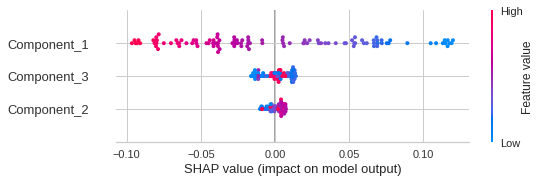

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_et_pca, plot='summary')


In [ ]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_et_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
